# Exam on Convolutional Neural Networks (CNN)

Welcome to the Convolutional Neural Networks (CNN) practical exam. In this exam, you will work on an image classification task to predict the type of traffic sign. You are provided with a dataset of traffic sign images, and your task is to build, train, and evaluate a CNN model.

---

## Dataset Overview
### **Dataset:**
* Just run the command under the `Load Data` section to get the data downloaded and unzipped or you can access it [here](https://drive.google.com/file/d/1HwMV-Lt_sWoxc5v6igmTxTwomS3DR6cQ/view?usp=sharing)
### **Dataset Name:** Traffic Signs

### **Description:**  
The dataset contains images of various German traffic signs labeled for classification purposes. Each image belongs to one of the 43 classes, representing different types of traffic signs.

### **Labels:**
```python
classes = {
    0:  'Speed limit (20km/h)',
    1:  'Speed limit (30km/h)',
    2:  'Speed limit (50km/h)',
    3:  'Speed limit (60km/h)',
    4:  'Speed limit (70km/h)',
    5:  'Speed limit (80km/h)',
    6:  'End of speed limit (80km/h)',
    7:  'Speed limit (100km/h)',
    8:  'Speed limit (120km/h)',
    9:  'No passing',
    10: 'No passing veh over 3.5 tons',
    11: 'Right-of-way at intersection',
    12: 'Priority road',
    13: 'Yield',
    14: 'Stop',
    15: 'No vehicles',
    16: 'Veh > 3.5 tons prohibited',
    17: 'No entry',
    18: 'General caution',
    19: 'Dangerous curve left',
    20: 'Dangerous curve right',
    21: 'Double curve',
    22: 'Bumpy road',
    23: 'Slippery road',
    24: 'Road narrows on the right',
    25: 'Road work',
    26: 'Traffic signals',
    27: 'Pedestrians',
    28: 'Children crossing',
    29: 'Bicycles crossing',
    30: 'Beware of ice/snow',
    31: 'Wild animals crossing',
    32: 'End speed + passing limits',
    33: 'Turn right ahead',
    34: 'Turn left ahead',
    35: 'Ahead only',
    36: 'Go straight or right',
    37: 'Go straight or left',
    38: 'Keep right',
    39: 'Keep left',
    40: 'Roundabout mandatory',
    41: 'End of no passing',
    42: 'End no passing veh > 3.5 tons'
}
```



## Load Data
Run the following command to get the data and unzip it, alternatively you can access the data [here](https://drive.google.com/file/d/1HwMV-Lt_sWoxc5v6igmTxTwomS3DR6cQ/view?usp=sharing).

In [3]:
#https://drive.google.com/file/d/1HwMV-Lt_sWoxc5v6igmTxTwomS3DR6cQ/view?usp=sharing
!pip install gdown
!gdown --id 1HwMV-Lt_sWoxc5v6igmTxTwomS3DR6cQ
!unzip Traffic_Signs.zip

Streaming output truncated to the last 5000 lines.
 extracting: Traffic_Signs/Dataset/13/00013_00004_00022.png  
  inflating: Traffic_Signs/Dataset/13/00013_00021_00029.png  
  inflating: Traffic_Signs/Dataset/13/00013_00003_00023.png  
 extracting: Traffic_Signs/Dataset/13/00013_00063_00007.png  
 extracting: Traffic_Signs/Dataset/13/00013_00034_00029.png  
  inflating: Traffic_Signs/Dataset/13/00013_00045_00013.png  
  inflating: Traffic_Signs/Dataset/13/00013_00068_00019.png  
 extracting: Traffic_Signs/Dataset/13/00013_00003_00004.png  
 extracting: Traffic_Signs/Dataset/13/00013_00017_00010.png  
 extracting: Traffic_Signs/Dataset/13/00013_00046_00003.png  
  inflating: Traffic_Signs/Dataset/13/00013_00057_00008.png  
 extracting: Traffic_Signs/Dataset/13/00013_00058_00011.png  
 extracting: Traffic_Signs/Dataset/13/00013_00063_00017.png  
 extracting: Traffic_Signs/Dataset/13/00013_00002_00013.png  
 extracting: Traffic_Signs/Dataset/13/00013_00002_00006.png  
  inflating: Traffi

## Import Libraries

In [1]:
#import tensorflow and keras
import tensorflow as tf
from keras import layers, models, datasets

#import pandas and matplotlib for accurcy visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
import cv2
import os
import shutil
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split


In [2]:
import pandas as pd
df = pd.read_csv('/content/Traffic_Signs/Dataset_MetaData.csv')
df

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,27,26,5,5,22,20,20,Dataset/20/00020_00000_00000.png
1,28,27,5,6,23,22,20,Dataset/20/00020_00000_00001.png
2,29,26,6,5,24,21,20,Dataset/20/00020_00000_00002.png
3,28,27,5,6,23,22,20,Dataset/20/00020_00000_00003.png
4,28,26,5,5,23,21,20,Dataset/20/00020_00000_00004.png
...,...,...,...,...,...,...,...,...
39204,52,56,5,6,47,51,42,Dataset/42/00042_00007_00025.png
39205,56,58,5,5,51,53,42,Dataset/42/00042_00007_00026.png
39206,58,62,5,6,53,57,42,Dataset/42/00042_00007_00027.png
39207,63,69,5,7,58,63,42,Dataset/42/00042_00007_00028.png


In [3]:
import pandas as pd

# Load the dataset metadata CSV file
df = pd.read_csv("/content/Traffic_Signs/Dataset_MetaData.csv")

# Get the image path and other relevant details for the image you want to display
image_info = df.iloc[0]  # Change the index to display a different image
image_info

,0
Width,27
Height,26
Roi.X1,5
Roi.Y1,5
Roi.X2,22
Roi.Y2,20
ClassId,20
Path,Dataset/20/00020_00000_00000.png


## Data Preprocessing
In this section, preprocess the dataset by:
- Loading the images from the file paths.
- Resizing the images to a consistent size.
- Normalizing pixel values.

Add more if needed!

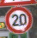

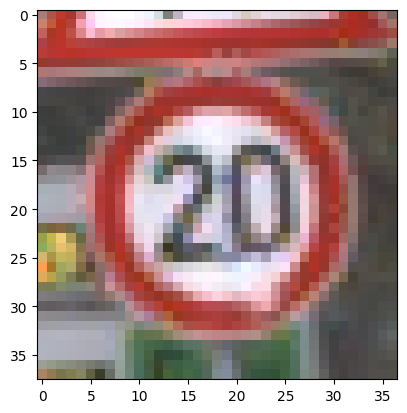

In [4]:
!pip install opencv-python
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

# Load the image
image_path = '/content/Traffic_Signs/Dataset/0/00000_00000_00012.png'
image = cv2.imread(image_path)

if image is not None:
    # Display using cv2_imshow
    cv2_imshow(image)

    # Optionally display using Matplotlib for a different view
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.show()
else:
    print(f"Failed to load image: {image_path}")

Images from folder 0:


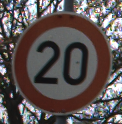

Loaded image: /content/Traffic_Signs/Dataset/0/00000_00002_00029.png


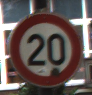

Loaded image: /content/Traffic_Signs/Dataset/0/00000_00006_00026.png


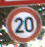

Loaded image: /content/Traffic_Signs/Dataset/0/00000_00001_00022.png


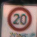

Loaded image: /content/Traffic_Signs/Dataset/0/00000_00003_00011.png


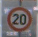

Loaded image: /content/Traffic_Signs/Dataset/0/00000_00002_00012.png


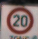

Loaded image: /content/Traffic_Signs/Dataset/0/00000_00003_00013.png


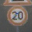

Loaded image: /content/Traffic_Signs/Dataset/0/00000_00005_00008.png


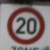

Loaded image: /content/Traffic_Signs/Dataset/0/00000_00003_00019.png


Loaded image: /content/Traffic_Signs/Dataset/0/00000_00002_00001.png


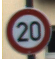

Loaded image: /content/Traffic_Signs/Dataset/0/00000_00004_00000.png


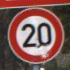

Loaded image: /content/Traffic_Signs/Dataset/0/00000_00000_00023.png


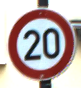

Loaded image: /content/Traffic_Signs/Dataset/0/00000_00004_00022.png


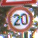

Loaded image: /content/Traffic_Signs/Dataset/0/00000_00001_00015.png


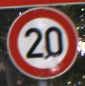

Loaded image: /content/Traffic_Signs/Dataset/0/00000_00000_00025.png


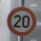

Loaded image: /content/Traffic_Signs/Dataset/0/00000_00002_00015.png


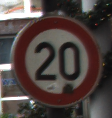

Loaded image: /content/Traffic_Signs/Dataset/0/00000_00006_00029.png


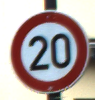

Loaded image: /content/Traffic_Signs/Dataset/0/00000_00004_00027.png


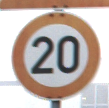

Loaded image: /content/Traffic_Signs/Dataset/0/00000_00005_00029.png


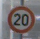

Loaded image: /content/Traffic_Signs/Dataset/0/00000_00002_00014.png


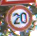

Loaded image: /content/Traffic_Signs/Dataset/0/00000_00001_00014.png


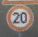

Loaded image: /content/Traffic_Signs/Dataset/0/00000_00005_00014.png


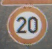

Loaded image: /content/Traffic_Signs/Dataset/0/00000_00005_00021.png


Loaded image: /content/Traffic_Signs/Dataset/0/00000_00002_00003.png


Loaded image: /content/Traffic_Signs/Dataset/0/00000_00005_00007.png


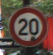

Loaded image: /content/Traffic_Signs/Dataset/0/00000_00006_00015.png


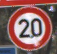

Loaded image: /content/Traffic_Signs/Dataset/0/00000_00000_00020.png


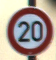

Loaded image: /content/Traffic_Signs/Dataset/0/00000_00004_00002.png


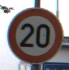

Loaded image: /content/Traffic_Signs/Dataset/0/00000_00002_00024.png


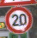

Loaded image: /content/Traffic_Signs/Dataset/0/00000_00000_00012.png


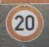

Loaded image: /content/Traffic_Signs/Dataset/0/00000_00005_00020.png


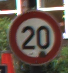

Loaded image: /content/Traffic_Signs/Dataset/0/00000_00006_00021.png


Loaded image: /content/Traffic_Signs/Dataset/0/00000_00000_00001.png


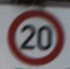

Loaded image: /content/Traffic_Signs/Dataset/0/00000_00003_00025.png


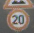

Loaded image: /content/Traffic_Signs/Dataset/0/00000_00005_00010.png


Loaded image: /content/Traffic_Signs/Dataset/0/00000_00003_00005.png


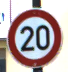

Loaded image: /content/Traffic_Signs/Dataset/0/00000_00004_00011.png


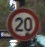

Loaded image: /content/Traffic_Signs/Dataset/0/00000_00006_00011.png


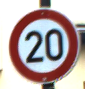

Loaded image: /content/Traffic_Signs/Dataset/0/00000_00004_00024.png


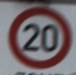

Loaded image: /content/Traffic_Signs/Dataset/0/00000_00003_00026.png


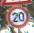

Loaded image: /content/Traffic_Signs/Dataset/0/00000_00001_00009.png


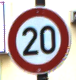

Loaded image: /content/Traffic_Signs/Dataset/0/00000_00004_00018.png


Loaded image: /content/Traffic_Signs/Dataset/0/00000_00003_00004.png


Loaded image: /content/Traffic_Signs/Dataset/0/00000_00000_00000.png


Loaded image: /content/Traffic_Signs/Dataset/0/00000_00005_00005.png


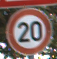

Loaded image: /content/Traffic_Signs/Dataset/0/00000_00001_00028.png


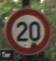

Loaded image: /content/Traffic_Signs/Dataset/0/00000_00006_00018.png


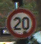

Loaded image: /content/Traffic_Signs/Dataset/0/00000_00006_00009.png


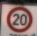

Loaded image: /content/Traffic_Signs/Dataset/0/00000_00003_00012.png


Loaded image: /content/Traffic_Signs/Dataset/0/00000_00005_00000.png


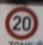

Loaded image: /content/Traffic_Signs/Dataset/0/00000_00003_00017.png


Loaded image: /content/Traffic_Signs/Dataset/0/00000_00005_00006.png


Loaded image: /content/Traffic_Signs/Dataset/0/00000_00000_00003.png


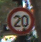

Loaded image: /content/Traffic_Signs/Dataset/0/00000_00006_00007.png


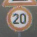

Loaded image: /content/Traffic_Signs/Dataset/0/00000_00005_00013.png


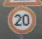

Loaded image: /content/Traffic_Signs/Dataset/0/00000_00005_00015.png


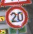

Loaded image: /content/Traffic_Signs/Dataset/0/00000_00000_00008.png


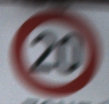

Loaded image: /content/Traffic_Signs/Dataset/0/00000_00003_00029.png


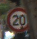

Loaded image: /content/Traffic_Signs/Dataset/0/00000_00006_00004.png


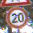

Loaded image: /content/Traffic_Signs/Dataset/0/00000_00001_00008.png


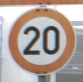

Loaded image: /content/Traffic_Signs/Dataset/0/00000_00005_00027.png


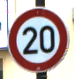

Loaded image: /content/Traffic_Signs/Dataset/0/00000_00004_00016.png


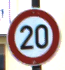

Loaded image: /content/Traffic_Signs/Dataset/0/00000_00004_00009.png


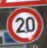

Loaded image: /content/Traffic_Signs/Dataset/0/00000_00000_00017.png


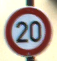

Loaded image: /content/Traffic_Signs/Dataset/0/00000_00004_00003.png


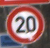

Loaded image: /content/Traffic_Signs/Dataset/0/00000_00000_00018.png


Loaded image: /content/Traffic_Signs/Dataset/0/00000_00002_00002.png


Loaded image: /content/Traffic_Signs/Dataset/0/00000_00002_00008.png


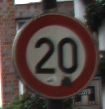

Loaded image: /content/Traffic_Signs/Dataset/0/00000_00006_00028.png


Loaded image: /content/Traffic_Signs/Dataset/0/00000_00001_00002.png


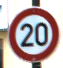

Loaded image: /content/Traffic_Signs/Dataset/0/00000_00004_00007.png


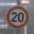

Loaded image: /content/Traffic_Signs/Dataset/0/00000_00002_00010.png


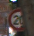

Loaded image: /content/Traffic_Signs/Dataset/0/00000_00006_00000.png


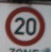

Loaded image: /content/Traffic_Signs/Dataset/0/00000_00003_00020.png


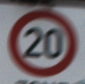

Loaded image: /content/Traffic_Signs/Dataset/0/00000_00003_00027.png


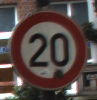

Loaded image: /content/Traffic_Signs/Dataset/0/00000_00006_00027.png


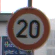

Loaded image: /content/Traffic_Signs/Dataset/0/00000_00002_00021.png


Loaded image: /content/Traffic_Signs/Dataset/0/00000_00000_00002.png


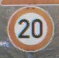

Loaded image: /content/Traffic_Signs/Dataset/0/00000_00005_00023.png


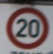

Loaded image: /content/Traffic_Signs/Dataset/0/00000_00003_00021.png


Loaded image: /content/Traffic_Signs/Dataset/0/00000_00002_00000.png


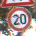

Loaded image: /content/Traffic_Signs/Dataset/0/00000_00001_00012.png


Loaded image: /content/Traffic_Signs/Dataset/0/00000_00003_00002.png


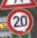

Loaded image: /content/Traffic_Signs/Dataset/0/00000_00000_00011.png


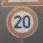

Loaded image: /content/Traffic_Signs/Dataset/0/00000_00005_00017.png


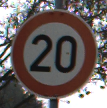

Loaded image: /content/Traffic_Signs/Dataset/0/00000_00002_00028.png


Loaded image: /content/Traffic_Signs/Dataset/0/00000_00005_00004.png


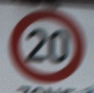

Loaded image: /content/Traffic_Signs/Dataset/0/00000_00003_00028.png


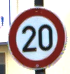

Loaded image: /content/Traffic_Signs/Dataset/0/00000_00004_00014.png


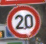

Loaded image: /content/Traffic_Signs/Dataset/0/00000_00000_00016.png


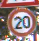

Loaded image: /content/Traffic_Signs/Dataset/0/00000_00001_00017.png


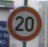

Loaded image: /content/Traffic_Signs/Dataset/0/00000_00002_00018.png


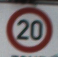

Loaded image: /content/Traffic_Signs/Dataset/0/00000_00003_00022.png


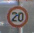

Loaded image: /content/Traffic_Signs/Dataset/0/00000_00002_00009.png


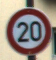

Loaded image: /content/Traffic_Signs/Dataset/0/00000_00004_00001.png


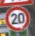

Loaded image: /content/Traffic_Signs/Dataset/0/00000_00000_00010.png


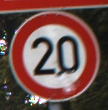

Loaded image: /content/Traffic_Signs/Dataset/0/00000_00000_00027.png


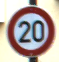

Loaded image: /content/Traffic_Signs/Dataset/0/00000_00004_00004.png


Loaded image: /content/Traffic_Signs/Dataset/0/00000_00003_00000.png


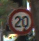

Loaded image: /content/Traffic_Signs/Dataset/0/00000_00006_00006.png


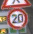

Loaded image: /content/Traffic_Signs/Dataset/0/00000_00000_00006.png


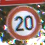

Loaded image: /content/Traffic_Signs/Dataset/0/00000_00001_00021.png


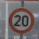

Loaded image: /content/Traffic_Signs/Dataset/0/00000_00002_00013.png


Loaded image: /content/Traffic_Signs/Dataset/0/00000_00002_00004.png


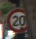

Loaded image: /content/Traffic_Signs/Dataset/0/00000_00006_00003.png


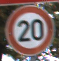

Loaded image: /content/Traffic_Signs/Dataset/0/00000_00001_00029.png


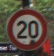

Loaded image: /content/Traffic_Signs/Dataset/0/00000_00006_00016.png


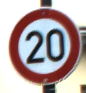

Loaded image: /content/Traffic_Signs/Dataset/0/00000_00004_00025.png


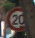

Loaded image: /content/Traffic_Signs/Dataset/0/00000_00006_00002.png


Loaded image: /content/Traffic_Signs/Dataset/0/00000_00000_00004.png


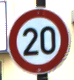

Loaded image: /content/Traffic_Signs/Dataset/0/00000_00004_00017.png


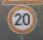

Loaded image: /content/Traffic_Signs/Dataset/0/00000_00005_00016.png


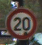

Loaded image: /content/Traffic_Signs/Dataset/0/00000_00006_00010.png


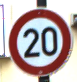

Loaded image: /content/Traffic_Signs/Dataset/0/00000_00004_00019.png


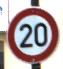

Loaded image: /content/Traffic_Signs/Dataset/0/00000_00004_00008.png


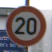

Loaded image: /content/Traffic_Signs/Dataset/0/00000_00002_00020.png


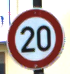

Loaded image: /content/Traffic_Signs/Dataset/0/00000_00004_00013.png


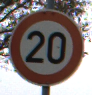

Loaded image: /content/Traffic_Signs/Dataset/0/00000_00002_00027.png


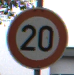

Loaded image: /content/Traffic_Signs/Dataset/0/00000_00002_00025.png


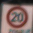

Loaded image: /content/Traffic_Signs/Dataset/0/00000_00003_00008.png


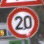

Loaded image: /content/Traffic_Signs/Dataset/0/00000_00000_00015.png


Loaded image: /content/Traffic_Signs/Dataset/0/00000_00003_00007.png


Loaded image: /content/Traffic_Signs/Dataset/0/00000_00001_00003.png


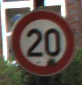

Loaded image: /content/Traffic_Signs/Dataset/0/00000_00006_00024.png


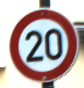

Loaded image: /content/Traffic_Signs/Dataset/0/00000_00004_00023.png


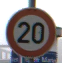

Loaded image: /content/Traffic_Signs/Dataset/0/00000_00002_00023.png


Loaded image: /content/Traffic_Signs/Dataset/0/00000_00001_00004.png


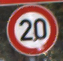

Loaded image: /content/Traffic_Signs/Dataset/0/00000_00000_00022.png


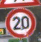

Loaded image: /content/Traffic_Signs/Dataset/0/00000_00000_00014.png


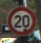

Loaded image: /content/Traffic_Signs/Dataset/0/00000_00006_00008.png


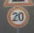

Loaded image: /content/Traffic_Signs/Dataset/0/00000_00005_00009.png


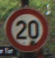

Loaded image: /content/Traffic_Signs/Dataset/0/00000_00006_00017.png


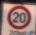

Loaded image: /content/Traffic_Signs/Dataset/0/00000_00003_00010.png


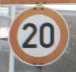

Loaded image: /content/Traffic_Signs/Dataset/0/00000_00005_00026.png


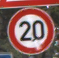

Loaded image: /content/Traffic_Signs/Dataset/0/00000_00000_00021.png


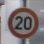

Loaded image: /content/Traffic_Signs/Dataset/0/00000_00002_00016.png


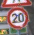

Loaded image: /content/Traffic_Signs/Dataset/0/00000_00000_00007.png


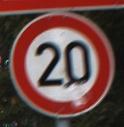

Loaded image: /content/Traffic_Signs/Dataset/0/00000_00000_00028.png


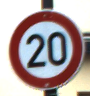

Loaded image: /content/Traffic_Signs/Dataset/0/00000_00004_00026.png


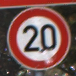

Loaded image: /content/Traffic_Signs/Dataset/0/00000_00000_00024.png


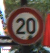

Loaded image: /content/Traffic_Signs/Dataset/0/00000_00006_00014.png


Loaded image: /content/Traffic_Signs/Dataset/0/00000_00001_00000.png


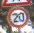

Loaded image: /content/Traffic_Signs/Dataset/0/00000_00001_00007.png


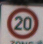

Loaded image: /content/Traffic_Signs/Dataset/0/00000_00003_00016.png


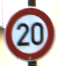

Loaded image: /content/Traffic_Signs/Dataset/0/00000_00004_00006.png


Loaded image: /content/Traffic_Signs/Dataset/0/00000_00002_00006.png


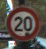

Loaded image: /content/Traffic_Signs/Dataset/0/00000_00006_00012.png


Loaded image: /content/Traffic_Signs/Dataset/0/00000_00003_00003.png


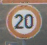

Loaded image: /content/Traffic_Signs/Dataset/0/00000_00005_00019.png


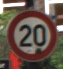

Loaded image: /content/Traffic_Signs/Dataset/0/00000_00006_00020.png


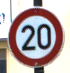

Loaded image: /content/Traffic_Signs/Dataset/0/00000_00004_00012.png


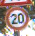

Loaded image: /content/Traffic_Signs/Dataset/0/00000_00001_00011.png


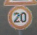

Loaded image: /content/Traffic_Signs/Dataset/0/00000_00005_00012.png


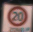

Loaded image: /content/Traffic_Signs/Dataset/0/00000_00003_00006.png


Loaded image: /content/Traffic_Signs/Dataset/0/00000_00005_00002.png


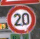

Loaded image: /content/Traffic_Signs/Dataset/0/00000_00000_00013.png


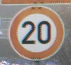

Loaded image: /content/Traffic_Signs/Dataset/0/00000_00005_00025.png


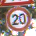

Loaded image: /content/Traffic_Signs/Dataset/0/00000_00001_00013.png


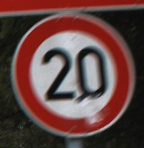

Loaded image: /content/Traffic_Signs/Dataset/0/00000_00000_00029.png


Loaded image: /content/Traffic_Signs/Dataset/0/00000_00001_00001.png


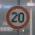

Loaded image: /content/Traffic_Signs/Dataset/0/00000_00002_00011.png


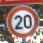

Loaded image: /content/Traffic_Signs/Dataset/0/00000_00001_00020.png


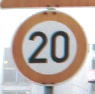

Loaded image: /content/Traffic_Signs/Dataset/0/00000_00005_00028.png


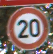

Loaded image: /content/Traffic_Signs/Dataset/0/00000_00001_00026.png


Loaded image: /content/Traffic_Signs/Dataset/0/00000_00005_00001.png


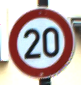

Loaded image: /content/Traffic_Signs/Dataset/0/00000_00004_00021.png


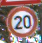

Loaded image: /content/Traffic_Signs/Dataset/0/00000_00001_00019.png


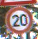

Loaded image: /content/Traffic_Signs/Dataset/0/00000_00001_00016.png


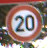

Loaded image: /content/Traffic_Signs/Dataset/0/00000_00001_00023.png


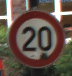

Loaded image: /content/Traffic_Signs/Dataset/0/00000_00006_00022.png


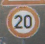

Loaded image: /content/Traffic_Signs/Dataset/0/00000_00005_00018.png


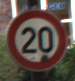

Loaded image: /content/Traffic_Signs/Dataset/0/00000_00006_00023.png


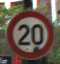

Loaded image: /content/Traffic_Signs/Dataset/0/00000_00006_00019.png


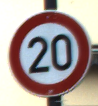

Loaded image: /content/Traffic_Signs/Dataset/0/00000_00004_00028.png


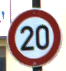

Loaded image: /content/Traffic_Signs/Dataset/0/00000_00004_00010.png


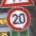

Loaded image: /content/Traffic_Signs/Dataset/0/00000_00000_00009.png


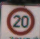

Loaded image: /content/Traffic_Signs/Dataset/0/00000_00003_00014.png


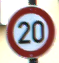

Loaded image: /content/Traffic_Signs/Dataset/0/00000_00004_00005.png


Loaded image: /content/Traffic_Signs/Dataset/0/00000_00002_00005.png


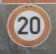

Loaded image: /content/Traffic_Signs/Dataset/0/00000_00005_00022.png


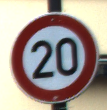

Loaded image: /content/Traffic_Signs/Dataset/0/00000_00004_00029.png


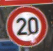

Loaded image: /content/Traffic_Signs/Dataset/0/00000_00000_00019.png


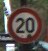

Loaded image: /content/Traffic_Signs/Dataset/0/00000_00006_00013.png


Loaded image: /content/Traffic_Signs/Dataset/0/00000_00005_00003.png


Loaded image: /content/Traffic_Signs/Dataset/0/00000_00002_00007.png


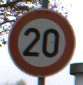

Loaded image: /content/Traffic_Signs/Dataset/0/00000_00002_00026.png


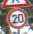

Loaded image: /content/Traffic_Signs/Dataset/0/00000_00001_00006.png


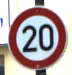

Loaded image: /content/Traffic_Signs/Dataset/0/00000_00004_00015.png


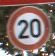

Loaded image: /content/Traffic_Signs/Dataset/0/00000_00001_00027.png


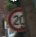

Loaded image: /content/Traffic_Signs/Dataset/0/00000_00006_00001.png


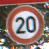

Loaded image: /content/Traffic_Signs/Dataset/0/00000_00001_00024.png


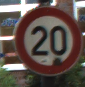

Loaded image: /content/Traffic_Signs/Dataset/0/00000_00006_00025.png


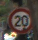

Loaded image: /content/Traffic_Signs/Dataset/0/00000_00006_00005.png


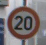

Loaded image: /content/Traffic_Signs/Dataset/0/00000_00002_00017.png


Loaded image: /content/Traffic_Signs/Dataset/0/00000_00003_00001.png


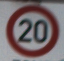

Loaded image: /content/Traffic_Signs/Dataset/0/00000_00003_00024.png


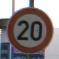

Loaded image: /content/Traffic_Signs/Dataset/0/00000_00002_00022.png


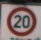

Loaded image: /content/Traffic_Signs/Dataset/0/00000_00003_00015.png


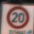

Loaded image: /content/Traffic_Signs/Dataset/0/00000_00003_00009.png


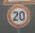

Loaded image: /content/Traffic_Signs/Dataset/0/00000_00005_00011.png


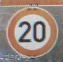

Loaded image: /content/Traffic_Signs/Dataset/0/00000_00005_00024.png


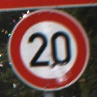

Loaded image: /content/Traffic_Signs/Dataset/0/00000_00000_00026.png


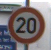

Loaded image: /content/Traffic_Signs/Dataset/0/00000_00002_00019.png


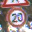

Loaded image: /content/Traffic_Signs/Dataset/0/00000_00001_00005.png


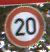

Loaded image: /content/Traffic_Signs/Dataset/0/00000_00001_00025.png


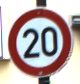

Loaded image: /content/Traffic_Signs/Dataset/0/00000_00004_00020.png


Loaded image: /content/Traffic_Signs/Dataset/0/00000_00000_00005.png


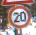

Loaded image: /content/Traffic_Signs/Dataset/0/00000_00001_00010.png


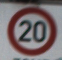

Loaded image: /content/Traffic_Signs/Dataset/0/00000_00003_00023.png


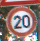

Loaded image: /content/Traffic_Signs/Dataset/0/00000_00001_00018.png


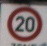

Loaded image: /content/Traffic_Signs/Dataset/0/00000_00003_00018.png
Images from folder 1:


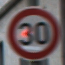

Loaded image: /content/Traffic_Signs/Dataset/1/00001_00020_00019.png


Loaded image: /content/Traffic_Signs/Dataset/1/00001_00065_00005.png


Loaded image: /content/Traffic_Signs/Dataset/1/00001_00052_00002.png


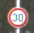

Loaded image: /content/Traffic_Signs/Dataset/1/00001_00034_00007.png


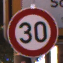

Loaded image: /content/Traffic_Signs/Dataset/1/00001_00005_00028.png


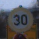

Loaded image: /content/Traffic_Signs/Dataset/1/00001_00069_00011.png


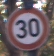

Loaded image: /content/Traffic_Signs/Dataset/1/00001_00002_00014.png


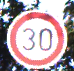

Loaded image: /content/Traffic_Signs/Dataset/1/00001_00007_00017.png


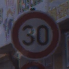

Loaded image: /content/Traffic_Signs/Dataset/1/00001_00072_00016.png


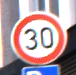

Loaded image: /content/Traffic_Signs/Dataset/1/00001_00071_00024.png


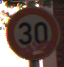

Loaded image: /content/Traffic_Signs/Dataset/1/00001_00051_00024.png


Loaded image: /content/Traffic_Signs/Dataset/1/00001_00019_00002.png


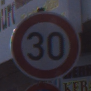

Loaded image: /content/Traffic_Signs/Dataset/1/00001_00072_00026.png


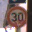

Loaded image: /content/Traffic_Signs/Dataset/1/00001_00051_00002.png


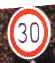

Loaded image: /content/Traffic_Signs/Dataset/1/00001_00006_00014.png


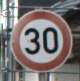

Loaded image: /content/Traffic_Signs/Dataset/1/00001_00029_00024.png


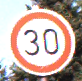

Loaded image: /content/Traffic_Signs/Dataset/1/00001_00054_00025.png


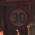

Loaded image: /content/Traffic_Signs/Dataset/1/00001_00003_00009.png


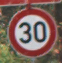

Loaded image: /content/Traffic_Signs/Dataset/1/00001_00064_00023.png


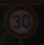

Loaded image: /content/Traffic_Signs/Dataset/1/00001_00012_00017.png


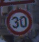

Loaded image: /content/Traffic_Signs/Dataset/1/00001_00039_00008.png


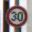

Loaded image: /content/Traffic_Signs/Dataset/1/00001_00027_00007.png


Loaded image: /content/Traffic_Signs/Dataset/1/00001_00009_00002.png


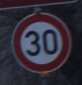

Loaded image: /content/Traffic_Signs/Dataset/1/00001_00039_00025.png


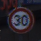

Loaded image: /content/Traffic_Signs/Dataset/1/00001_00044_00012.png


Loaded image: /content/Traffic_Signs/Dataset/1/00001_00031_00002.png


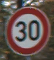

Loaded image: /content/Traffic_Signs/Dataset/1/00001_00055_00004.png


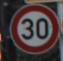

Loaded image: /content/Traffic_Signs/Dataset/1/00001_00066_00019.png


Loaded image: /content/Traffic_Signs/Dataset/1/00001_00024_00006.png


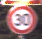

Loaded image: /content/Traffic_Signs/Dataset/1/00001_00050_00009.png


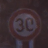

Loaded image: /content/Traffic_Signs/Dataset/1/00001_00046_00010.png


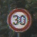

Loaded image: /content/Traffic_Signs/Dataset/1/00001_00057_00012.png


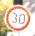

Loaded image: /content/Traffic_Signs/Dataset/1/00001_00017_00006.png


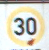

Loaded image: /content/Traffic_Signs/Dataset/1/00001_00073_00007.png


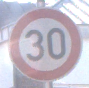

Loaded image: /content/Traffic_Signs/Dataset/1/00001_00000_00023.png


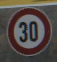

Loaded image: /content/Traffic_Signs/Dataset/1/00001_00008_00023.png


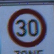

Loaded image: /content/Traffic_Signs/Dataset/1/00001_00041_00014.png


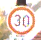

Loaded image: /content/Traffic_Signs/Dataset/1/00001_00017_00010.png


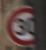

Loaded image: /content/Traffic_Signs/Dataset/1/00001_00020_00002.png


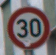

Loaded image: /content/Traffic_Signs/Dataset/1/00001_00067_00020.png


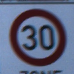

Loaded image: /content/Traffic_Signs/Dataset/1/00001_00041_00028.png


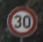

Loaded image: /content/Traffic_Signs/Dataset/1/00001_00057_00018.png


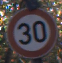

Loaded image: /content/Traffic_Signs/Dataset/1/00001_00002_00023.png


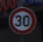

Loaded image: /content/Traffic_Signs/Dataset/1/00001_00044_00013.png


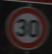

Loaded image: /content/Traffic_Signs/Dataset/1/00001_00013_00015.png


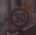

Loaded image: /content/Traffic_Signs/Dataset/1/00001_00048_00003.png


Loaded image: /content/Traffic_Signs/Dataset/1/00001_00037_00009.png


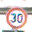

Loaded image: /content/Traffic_Signs/Dataset/1/00001_00065_00008.png


Loaded image: /content/Traffic_Signs/Dataset/1/00001_00057_00006.png


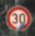

Loaded image: /content/Traffic_Signs/Dataset/1/00001_00062_00009.png


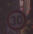

Loaded image: /content/Traffic_Signs/Dataset/1/00001_00052_00007.png


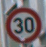

Loaded image: /content/Traffic_Signs/Dataset/1/00001_00067_00016.png


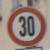

Loaded image: /content/Traffic_Signs/Dataset/1/00001_00015_00020.png


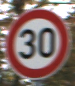

Loaded image: /content/Traffic_Signs/Dataset/1/00001_00055_00022.png


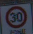

Loaded image: /content/Traffic_Signs/Dataset/1/00001_00038_00014.png


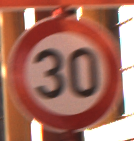

Loaded image: /content/Traffic_Signs/Dataset/1/00001_00003_00028.png


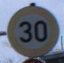

Loaded image: /content/Traffic_Signs/Dataset/1/00001_00069_00023.png


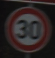

Loaded image: /content/Traffic_Signs/Dataset/1/00001_00013_00017.png


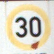

Loaded image: /content/Traffic_Signs/Dataset/1/00001_00073_00015.png


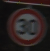

Loaded image: /content/Traffic_Signs/Dataset/1/00001_00013_00011.png


Loaded image: /content/Traffic_Signs/Dataset/1/00001_00063_00001.png


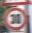

Loaded image: /content/Traffic_Signs/Dataset/1/00001_00014_00008.png


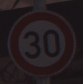

Loaded image: /content/Traffic_Signs/Dataset/1/00001_00052_00026.png


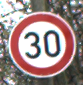

Loaded image: /content/Traffic_Signs/Dataset/1/00001_00032_00025.png


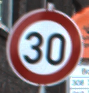

Loaded image: /content/Traffic_Signs/Dataset/1/00001_00059_00026.png


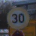

Loaded image: /content/Traffic_Signs/Dataset/1/00001_00069_00008.png


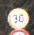

Loaded image: /content/Traffic_Signs/Dataset/1/00001_00036_00004.png


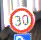

Loaded image: /content/Traffic_Signs/Dataset/1/00001_00071_00007.png


Loaded image: /content/Traffic_Signs/Dataset/1/00001_00003_00000.png


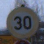

Loaded image: /content/Traffic_Signs/Dataset/1/00001_00069_00016.png


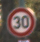

Loaded image: /content/Traffic_Signs/Dataset/1/00001_00021_00018.png


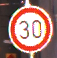

Loaded image: /content/Traffic_Signs/Dataset/1/00001_00053_00006.png


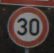

Loaded image: /content/Traffic_Signs/Dataset/1/00001_00010_00023.png


Loaded image: /content/Traffic_Signs/Dataset/1/00001_00052_00003.png


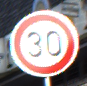

Loaded image: /content/Traffic_Signs/Dataset/1/00001_00045_00025.png


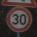

Loaded image: /content/Traffic_Signs/Dataset/1/00001_00010_00014.png


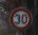

Loaded image: /content/Traffic_Signs/Dataset/1/00001_00023_00008.png


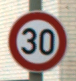

Loaded image: /content/Traffic_Signs/Dataset/1/00001_00027_00027.png


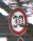

Loaded image: /content/Traffic_Signs/Dataset/1/00001_00030_00006.png


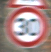

Loaded image: /content/Traffic_Signs/Dataset/1/00001_00026_00000.png


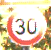

Loaded image: /content/Traffic_Signs/Dataset/1/00001_00001_00021.png


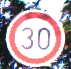

Loaded image: /content/Traffic_Signs/Dataset/1/00001_00007_00016.png


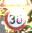

Loaded image: /content/Traffic_Signs/Dataset/1/00001_00001_00004.png


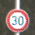

Loaded image: /content/Traffic_Signs/Dataset/1/00001_00034_00010.png


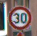

Loaded image: /content/Traffic_Signs/Dataset/1/00001_00033_00011.png


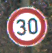

Loaded image: /content/Traffic_Signs/Dataset/1/00001_00032_00018.png


Loaded image: /content/Traffic_Signs/Dataset/1/00001_00037_00001.png


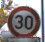

Loaded image: /content/Traffic_Signs/Dataset/1/00001_00058_00013.png


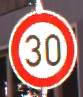

Loaded image: /content/Traffic_Signs/Dataset/1/00001_00053_00024.png


Loaded image: /content/Traffic_Signs/Dataset/1/00001_00065_00006.png


Loaded image: /content/Traffic_Signs/Dataset/1/00001_00065_00003.png


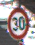

Loaded image: /content/Traffic_Signs/Dataset/1/00001_00030_00010.png


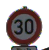

Loaded image: /content/Traffic_Signs/Dataset/1/00001_00022_00017.png


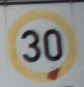

Loaded image: /content/Traffic_Signs/Dataset/1/00001_00073_00029.png


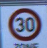

Loaded image: /content/Traffic_Signs/Dataset/1/00001_00041_00007.png


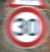

Loaded image: /content/Traffic_Signs/Dataset/1/00001_00026_00001.png


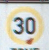

Loaded image: /content/Traffic_Signs/Dataset/1/00001_00073_00005.png


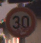

Loaded image: /content/Traffic_Signs/Dataset/1/00001_00051_00013.png


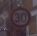

Loaded image: /content/Traffic_Signs/Dataset/1/00001_00072_00002.png


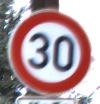

Loaded image: /content/Traffic_Signs/Dataset/1/00001_00017_00029.png


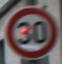

Loaded image: /content/Traffic_Signs/Dataset/1/00001_00020_00018.png


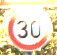

Loaded image: /content/Traffic_Signs/Dataset/1/00001_00001_00024.png


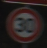

Loaded image: /content/Traffic_Signs/Dataset/1/00001_00013_00008.png


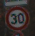

Loaded image: /content/Traffic_Signs/Dataset/1/00001_00063_00012.png


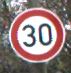

Loaded image: /content/Traffic_Signs/Dataset/1/00001_00032_00023.png


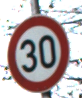

Loaded image: /content/Traffic_Signs/Dataset/1/00001_00030_00026.png


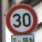

Loaded image: /content/Traffic_Signs/Dataset/1/00001_00035_00019.png


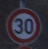

Loaded image: /content/Traffic_Signs/Dataset/1/00001_00040_00015.png


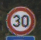

Loaded image: /content/Traffic_Signs/Dataset/1/00001_00009_00016.png


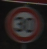

Loaded image: /content/Traffic_Signs/Dataset/1/00001_00013_00009.png


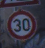

Loaded image: /content/Traffic_Signs/Dataset/1/00001_00039_00011.png


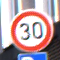

Loaded image: /content/Traffic_Signs/Dataset/1/00001_00071_00020.png


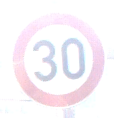

Loaded image: /content/Traffic_Signs/Dataset/1/00001_00000_00029.png


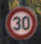

Loaded image: /content/Traffic_Signs/Dataset/1/00001_00061_00016.png


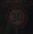

Loaded image: /content/Traffic_Signs/Dataset/1/00001_00012_00007.png


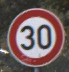

Loaded image: /content/Traffic_Signs/Dataset/1/00001_00056_00022.png


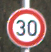

Loaded image: /content/Traffic_Signs/Dataset/1/00001_00034_00020.png


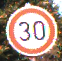

Loaded image: /content/Traffic_Signs/Dataset/1/00001_00054_00020.png


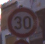

Loaded image: /content/Traffic_Signs/Dataset/1/00001_00072_00009.png


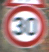

Loaded image: /content/Traffic_Signs/Dataset/1/00001_00026_00002.png


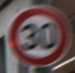

Loaded image: /content/Traffic_Signs/Dataset/1/00001_00020_00024.png


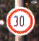

Loaded image: /content/Traffic_Signs/Dataset/1/00001_00016_00009.png


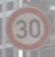

Loaded image: /content/Traffic_Signs/Dataset/1/00001_00000_00001.png


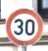

Loaded image: /content/Traffic_Signs/Dataset/1/00001_00065_00019.png


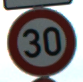

Loaded image: /content/Traffic_Signs/Dataset/1/00001_00063_00026.png


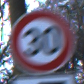

Loaded image: /content/Traffic_Signs/Dataset/1/00001_00070_00019.png


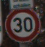

Loaded image: /content/Traffic_Signs/Dataset/1/00001_00037_00020.png


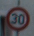

Loaded image: /content/Traffic_Signs/Dataset/1/00001_00004_00018.png


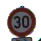

Loaded image: /content/Traffic_Signs/Dataset/1/00001_00022_00012.png


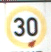

Loaded image: /content/Traffic_Signs/Dataset/1/00001_00073_00011.png


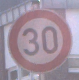

Loaded image: /content/Traffic_Signs/Dataset/1/00001_00000_00019.png


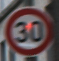

Loaded image: /content/Traffic_Signs/Dataset/1/00001_00020_00015.png


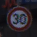

Loaded image: /content/Traffic_Signs/Dataset/1/00001_00044_00011.png


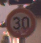

Loaded image: /content/Traffic_Signs/Dataset/1/00001_00051_00012.png


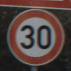

Loaded image: /content/Traffic_Signs/Dataset/1/00001_00010_00027.png


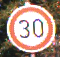

Loaded image: /content/Traffic_Signs/Dataset/1/00001_00054_00019.png


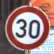

Loaded image: /content/Traffic_Signs/Dataset/1/00001_00059_00018.png


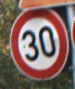

Loaded image: /content/Traffic_Signs/Dataset/1/00001_00028_00025.png


Loaded image: /content/Traffic_Signs/Dataset/1/00001_00022_00001.png


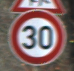

Loaded image: /content/Traffic_Signs/Dataset/1/00001_00026_00015.png


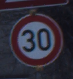

Loaded image: /content/Traffic_Signs/Dataset/1/00001_00039_00023.png


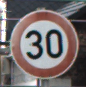

Loaded image: /content/Traffic_Signs/Dataset/1/00001_00029_00025.png


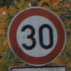

Loaded image: /content/Traffic_Signs/Dataset/1/00001_00018_00018.png


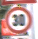

Loaded image: /content/Traffic_Signs/Dataset/1/00001_00014_00013.png


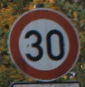

Loaded image: /content/Traffic_Signs/Dataset/1/00001_00018_00022.png


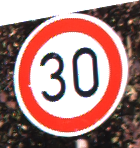

Loaded image: /content/Traffic_Signs/Dataset/1/00001_00006_00029.png


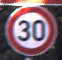

Loaded image: /content/Traffic_Signs/Dataset/1/00001_00050_00025.png


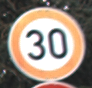

Loaded image: /content/Traffic_Signs/Dataset/1/00001_00036_00029.png


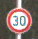

Loaded image: /content/Traffic_Signs/Dataset/1/00001_00034_00012.png


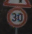

Loaded image: /content/Traffic_Signs/Dataset/1/00001_00010_00008.png


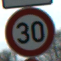

Loaded image: /content/Traffic_Signs/Dataset/1/00001_00063_00023.png


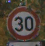

Loaded image: /content/Traffic_Signs/Dataset/1/00001_00018_00006.png


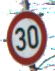

Loaded image: /content/Traffic_Signs/Dataset/1/00001_00030_00021.png


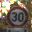

Loaded image: /content/Traffic_Signs/Dataset/1/00001_00058_00005.png


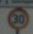

Loaded image: /content/Traffic_Signs/Dataset/1/00001_00024_00028.png


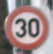

Loaded image: /content/Traffic_Signs/Dataset/1/00001_00060_00020.png


Loaded image: /content/Traffic_Signs/Dataset/1/00001_00015_00004.png


Loaded image: /content/Traffic_Signs/Dataset/1/00001_00057_00002.png


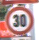

Loaded image: /content/Traffic_Signs/Dataset/1/00001_00014_00014.png


Loaded image: /content/Traffic_Signs/Dataset/1/00001_00065_00004.png


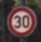

Loaded image: /content/Traffic_Signs/Dataset/1/00001_00061_00013.png


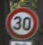

Loaded image: /content/Traffic_Signs/Dataset/1/00001_00019_00020.png


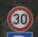

Loaded image: /content/Traffic_Signs/Dataset/1/00001_00009_00013.png


Loaded image: /content/Traffic_Signs/Dataset/1/00001_00025_00002.png


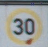

Loaded image: /content/Traffic_Signs/Dataset/1/00001_00073_00001.png


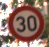

Loaded image: /content/Traffic_Signs/Dataset/1/00001_00004_00004.png


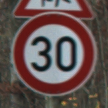

Loaded image: /content/Traffic_Signs/Dataset/1/00001_00026_00027.png


Loaded image: /content/Traffic_Signs/Dataset/1/00001_00038_00000.png


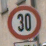

Loaded image: /content/Traffic_Signs/Dataset/1/00001_00015_00018.png


Loaded image: /content/Traffic_Signs/Dataset/1/00001_00024_00009.png


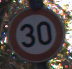

Loaded image: /content/Traffic_Signs/Dataset/1/00001_00002_00028.png


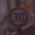

Loaded image: /content/Traffic_Signs/Dataset/1/00001_00048_00002.png


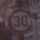

Loaded image: /content/Traffic_Signs/Dataset/1/00001_00047_00010.png


KeyboardInterrupt: 

In [5]:
import cv2
from google.colab.patches import cv2_imshow
import os

# Base directory containing the images
base_directory = '/content/Traffic_Signs/Dataset/'

# Iterate through folders 0 to 9
for i in range(10):
    folder_path = os.path.join(base_directory, str(i))

    # Check if the folder exists
    if os.path.exists(folder_path):
        print(f"Images from folder {i}:")

        # Iterate through all files in the folder
        for filename in os.listdir(folder_path):
            if filename.endswith(".png"):
                image_path = os.path.join(folder_path, filename)

                # Load and display the image
                image = cv2.imread(image_path)
                if image is not None:
                    cv2_imshow(image)
                    print(f"Loaded image: {image_path}")
                else:
                    print(f"Failed to load image: {image_path}")
    else:
        print(f"Folder {i} does not exist.")

In [5]:

base_directory = '/content/Traffic_Signs/Dataset'
target_size = (128, 128)


In [6]:
def preprocess_image(image_path, target_size):
    image = cv2.imread(image_path)

    if image is not None:
        image = cv2.resize(image, target_size)
        image = image.astype('float32') / 255.0

        return image
    else:
        return None


In [7]:
def preprocess_images_in_directory(directory, target_size):
    X = []
    y = []
    for i in range(10):
        folder_path = os.path.join(directory, str(i))
        if os.path.exists(folder_path):
            images = [img for img in os.listdir(folder_path) if img.endswith(".png")]
            for img in images:
                image_path = os.path.join(folder_path, img)
                preprocessed_image = preprocess_image(image_path, target_size)
                if preprocessed_image is not None:
                    X.append(preprocessed_image)
                    y.append(i)
    return np.array(X), np.array(y)

In [8]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split

base_directory = '/content/Traffic_Signs/Dataset'
target_size = (128, 128)
X, y = preprocess_images_in_directory(base_directory, target_size)
print(f"Shape of preprocessed data: {X.shape}")
print(f"Shape of labels: {y.shape}")

Shape of preprocessed data: (14670, 128, 128, 3)
Shape of labels: (14670,)


## Data Splitting
In this section, we will split our dataset into three parts:

* Training set (70%).
* Validation set (15%).
* Test set (15%).

In [9]:

base_directory = '/content/Traffic_Signs/Dataset/'
output_directory = '/content/Traffic_Signs/Split/'
train_ratio = 0.7

test_ratio = 0.15
val_ratio = 0.15

In [10]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
import shutil # Import the shutil module

base_directory = '/content/Traffic_Signs/Dataset/'
output_directory = '/content/Traffic_Signs/Split/'
train_ratio = 0.7
test_ratio = 0.15
val_ratio = 0.15

for i in range(10):
    folder_path = os.path.join(base_directory, str(i))
    if os.path.exists(folder_path):
        images = [img for img in os.listdir(folder_path) if img.endswith(".png")]
        train_images, test_val_images = train_test_split(images, test_size=test_ratio + val_ratio, random_state=42)
        test_images, val_images = train_test_split(test_val_images, test_size=val_ratio/(test_ratio + val_ratio), random_state=42)
        for split in ['train', 'test', 'val']:
            split_path = os.path.join(output_directory, split, str(i))
            os.makedirs(split_path, exist_ok=True)
        for img in train_images:
            shutil.copyfile(os.path.join(folder_path, img), os.path.join(output_directory, 'train', str(i), img))
        for img in test_images:
            shutil.copyfile(os.path.join(folder_path, img), os.path.join(output_directory, 'test', str(i), img))
        for img in val_images:
            shutil.copyfile(os.path.join(folder_path, img), os.path.join(output_directory, 'val', str(i), img))

    else:
        print(f"Folder {i} does not exist.")

## Building the CNN Model
In this section, define the architecture of the CNN model. The architecture may consist of:
- Convolutional layers with max-pooling
- Dropout layers
- Flatten layer
- Dense layers
- Output layer

Add and remove any of these as needed!

In [11]:
def create_cnn_model(input_shape, num_classes):
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(num_classes, activation='softmax'))
    return model

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Assuming num_classes is defined somewhere
num_classes = 43 # Example

model = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(num_classes, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
input_shape = (128, 128, 3)
num_classes = 5
model = create_cnn_model(input_shape, num_classes)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 57600)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       7,372,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,392,965 (28.20 MB)

 Trainable params: 7,392,965 (28.20 MB)

 Non-trainable params: 0 (0.00 B)

## Training the Model
Train the CNN model using the training data and validate it on the validation set.

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
history = model.fit(X_train, y_train, epochs=4, batch_size=16, validation_data=(X_val, y_val))

## Evaluate the Model
Evaluate the performance of the model on the test set.

In [ ]:
# Assuming X_test and y_test are your preprocessed test data and labels
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

In [ ]:
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f'Validation Loss: {val_loss}')
print(f'Validation Accuracy: {val_accuracy}')

## Make Predictions
Use the trained model to make predictions on new or unseen traffic sign images.

if you need new, we prepared some data for you [here](https://drive.google.com/file/d/1S_vpQntND9839x8kJpegaEgtSIA4JxHO/view?usp=sharing), or you can simply run the following command to get the data and unzip it.

<small>Note: please note that the file contain MetaData to tell you what each image contains <b>THIS IS JUST FOR YOU TO MAKE SURE</b></smmall>

In [ ]:
#https://drive.google.com/file/d/1S_vpQntND9839x8kJpegaEgtSIA4JxHO/view?usp=sharing
!gdown --id 1S_vpQntND9839x8kJpegaEgtSIA4JxHO
!unzip Test_Dataset.zip

In [ ]:
from tensorflow.keras.models import load_model

# Load the trained CNN model
model = load_model('path_to_your_trained_model.h5')

In [ ]:
import cv2
import numpy as np

def preprocess_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.resize(image, (image_width, image_height))  # Specify the width and height used during training
    image = image.astype('float32') / 255.0  # Normalize pixel values
    return image

# Define the width and height of the images used during training
image_width = 32
image_height = 32

# Path to the new or unseen traffic sign images
new_image_path = 'path_to_new_image.jpg'

# Preprocess the new image
new_image = preprocess_image(new_image_path)

In [ ]:
# Expand the dimensions of the image to match the model's input shape
new_image = np.expand_dims(new_image, axis=0)

# Make predictions
predictions = model.predict(new_image)

# Assuming you have a list of class labels for reference
class_labels = ['label_0', 'label_1', 'label_2', ...]  # Update with actual class labels

# Get the predicted class
predicted_class_index = np.argmax(predictions)
predicted_class_label = class_labels[predicted_class_index]

print(f"Predicted Traffic Sign Class: {predicted_class_label}")

## Model Performance Visualization
Visualize performance metrics such as accuracy and loss over the epochs.

In [8]:
import matplotlib.pyplot as plt

# Assuming you have the history object from training your model
# history = model.fit(...)

# Plot training and validation accuracy values
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot training and validation loss values
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

NameError: name 'history' is not defined

<Figure size 1200x600 with 0 Axes>

## Save the Model
Save the trained CNN model for submission.

In [ ]:
from tensorflow.keras.models import load_model

# Assuming you have a trained model stored in the 'model' variable
# model = ...

# Save the model to a file
model.save('saved_model.h5')

## Project Questions:

1. **Data Preprocessing**: Explain why you chose your specific data preprocessing techniques (e.g., resizing images, normalization, data augmentation). How do these preprocessing steps improve the performance of your CNN model?
2. **Model Architecture**: Describe the architecture of your CNN model (e.g., number of convolutional layers, kernel sizes, pooling layers). Why did you choose this structure, and how do you expect each layer to contribute to feature extraction?
3. **Activation Functions**: Justify your choice of activation functions. How do they influence the training and output of your CNN?
4. **Training Process**: Discuss your choice of batch size, number of epochs, and optimizer. How did these decisions impact the training process and the convergence of the model?
5. **Loss Function and Metrics**: Explain why you chose the specific loss function and evaluation metrics for this classification task. How do they align with the goal of correctly classifying traffic signs?
6. **Regularization Techniques**: If you used regularization methods like dropout or batch normalization, explain why you implemented them and how they helped prevent overfitting in your model.
7. **Model Evaluation**: Justify the method you used to evaluate your model's performance on the test set. Why did you select these evaluation techniques, and what insights did they provide about your model's accuracy and generalization ability?
8. **Model Visualization**: Explain the significance of the performance visualizations (e.g., accuracy and loss curves). What do they tell you about your model's training process and its ability to generalize?
9. **Overfitting and Underfitting**: Analyze whether the model encountered any overfitting or underfitting during training. What strategies could you implement to mitigate these issues?

### Answer Here: q1: i use resizing to make all images fixed size cause the cnn is neded fix datas that is in the sane size.

q2: the input layer is depends on the dimension of the input images,